In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2023-03-02 16:31:20.807895: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2.10.0


In [2]:
# load data
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_image, train_labels), (test_image, test_labels) = fashion_mnist.load_data()

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   1   1   0   0   0
    0   0   0   0 164  50   0   7   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   1   0   0   1   1   0   0
    5   0  45 217 255 176   0   6   0   0]
 [  0   0   0   0   0   0   0   0   0   1   1   0   3   3   5   9   0   2
    0  62 236 231 215  27   0   1   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   29 244 231 234  74   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0   0   0  23  41  59 111 134
  138 226 202 217  22   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   5   0  35 179 195 182 225 198 241
  177 199 205 210  26   0   1   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0  19   0   0   

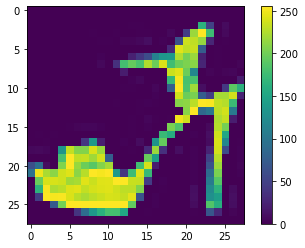

In [4]:
print(train_image[9])
image = train_image[9]
print(type(image))

plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [15]:
print(train_image.shape)
print(train_labels.shape)

(60000, 28, 28)
(60000,)


In [17]:
train_image = train_image / 255.0
test_image = test_image / 255.0

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.00392157 0.00392157 0.         0.         0.
  0.         0.         0.         0.         0.64313725 0.19607843
  0.         0.02745098 0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.00392157 0.         0.         0.00392157
  0

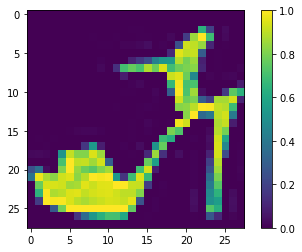

In [18]:
print(train_image[9])
image = train_image[9]

plt.figure()
plt.imshow(image)
plt.colorbar()
plt.grid(False)
plt.show()

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [30]:
model.fit(train_image,train_labels,epochs=10,batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3060 - accuracy: 0.8886
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2934 - accuracy: 0.8925
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.2819 - accuracy: 0.8971
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2689 - accuracy: 0.9026
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2638 - accuracy: 0.9031
Epoch 6/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2560 - accuracy: 0.9063
Epoch 7/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2476 - accuracy: 0.9096
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2384 - accuracy: 0.9133
Epoch 9/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2325 - accuracy: 0.9145
Epoch 10/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2263 - accuracy: 0.9170

In [31]:
test_loss, test_acc = model.evaluate(test_image,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3235 - accuracy: 0.8894

Test accuracy: 0.8894000053405762
